<a href="https://colab.research.google.com/github/emiliomercuri/EnvHidrology2024/blob/main/aulas/2024_03_22-Aula_08/Ca%CC%81lculo_da_A%CC%81gua_Precipita%CC%81vel_(6_camadas)_com_Enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exemplo**: Calcule a água precipitável em uma coluna de ar de $10$ km de altura sob uma área de $1$ m$^2$ da superfície do solo. A pressão na superfície é $101.3$ kPa, a temperatura do ar na superfície é $30$ $^\circ$C e o gradiente de temperatura (lapse rate) é $6.5$ $^\circ$C/km.

### Cálculo da Água Precipitável

Em uma atmosfera estática.

$
m_{p} = \sum \Delta m_{p}= \sum
 \bar{q}_{v} \bar{\rho}_{a} A \Delta z
$

Variação da pressão:

$
p_{2}=p_{1}\left(\frac{T_{2}}{T_{1}}\right)^{g / \alpha R_{a}}
$

Variação da Temperatura:

$
T_{2}=T_{1}-\alpha\left(z_{2}-z_{1}\right)
$


Lei dos gases ideais:

$
\rho_{a}=\frac{p}{R_{a} T}
$

In [2]:
import numpy
import pandas
import matplotlib.pyplot as plt

In [3]:
Ra = 287 # J/(kg K)
g = 9.81 # m/s^2
alpha = 0.0065  # K/m
g/(alpha*Ra)

5.258643795229162

In [4]:
# Calcula a temperatura na altura z2:
def temperatura(z1,z2,T1):
  alpha =  0.0065 # graus celsius / m
  return T1 - alpha*(z2-z1)

# Calcula a pressão na altura z2:
def pressao(p1,T1,T2):
  return p1*(T2/T1)**(5.258643795229162)

def densidade(p,T):
  return p*1000/(287*T)

def p_vap(T):
  return 0.611*numpy.exp(17.27*T/(237.3+T))   # kPa

def umid_esp(e,p):
  return 0.622*e/p

def agua_prec(qv_med, rho_med,dz):
  return qv_med*rho_med*1*dz

In [5]:
N_camadas = 6

In [6]:
elevacao = numpy.linspace(0,10000,N_camadas)

In [7]:
elevacao

array([    0.,  2000.,  4000.,  6000.,  8000., 10000.])

In [8]:
temperaturaC = numpy.zeros(N_camadas)
temperaturaK = numpy.zeros(N_camadas)
pressao_vet  = numpy.zeros(N_camadas)
dens_vet     = numpy.zeros(N_camadas)
p_vap_vet    = numpy.zeros(N_camadas)
temperaturaC[0] = 30.0
temperaturaK[0] = temperaturaC[0] + 273
pressao_vet[0] = 101.3
pressao_vet

array([101.3,   0. ,   0. ,   0. ,   0. ,   0. ])

In [9]:
tabela = pandas.DataFrame({'Elevação (m)': elevacao})

In [10]:
tabela

,Elevação (m)
0,0.0
1,2000.0
2,4000.0
3,6000.0
4,8000.0
5,10000.0


In [11]:
for i in range(1,N_camadas):
  #print(i)
  temperaturaC[i] = temperatura(elevacao[i-1],elevacao[i],temperaturaC[i-1])
  temperaturaK[i] = temperaturaC[i] + 273
  pressao_vet[i]  = pressao(pressao_vet[i-1],temperaturaK[i-1],temperaturaK[i])

In [12]:
tabela['Temperatura (oC)'] = temperaturaC
tabela['Temperatura (K)']  = temperaturaK
tabela['Pressao ar (kPa)']  = pressao_vet
tabela

,Elevação (m),Temperatura (oC),Temperatura (K),Pressao ar (kPa)
0,0.0,30.0,303.0,101.300000
1,2000.0,17.0,290.0,80.437862
2,4000.0,4.0,277.0,63.200083
3,6000.0,-9.0,264.0,49.083896
4,8000.0,-22.0,251.0,37.637077
5,10000.0,-35.0,238.0,28.454977


In [ ]:
#pressao_vet

In [13]:
dens_vet     = densidade(pressao_vet,temperaturaK)
p_vap_vet    = p_vap(temperaturaC)
umid_esp_vet = umid_esp(p_vap_vet,pressao_vet)

tabela['Densidade (kg/m3)'] = dens_vet
tabela['Pressão vapor (kPa)']  = p_vap_vet
tabela['Umid esp (kg/kg)']  = umid_esp_vet
tabela

,Elevação (m),Temperatura (oC),Temperatura (K),Pressao ar (kPa),Densidade (kg/m3),Pressão vapor (kPa),Umid esp (kg/kg)
0,0.0,30.0,303.0,101.300000,1.164890,4.244454,0.026062
1,2000.0,17.0,290.0,80.437862,0.966453,1.938364,0.014989
2,4000.0,4.0,277.0,63.200083,0.794980,0.813527,0.008007
3,6000.0,-9.0,264.0,49.083896,0.647818,0.309291,0.003919
4,8000.0,-22.0,251.0,37.637077,0.522469,0.104626,0.001729
5,10000.0,-35.0,238.0,28.454977,0.416581,0.030791,0.000673


### Água Precipitável
$
\Delta m_{p}=\bar{q}_{v} \bar{\rho}_{a} A \Delta z
$

In [14]:
umid_esp_vet

array([0.0260617 , 0.01498874, 0.00800654, 0.00391939, 0.00172908,
       0.00067305])

In [ ]:
#umid_esp_vet[:-1]

In [ ]:
#umid_esp_vet[1:]

In [15]:
umid_esp_media_vet = (umid_esp_vet[:-1]+umid_esp_vet[1:])/2
umid_esp_media_vet

array([0.02052522, 0.01149764, 0.00596297, 0.00282424, 0.00120107])

In [16]:
dens_media_vet = (dens_vet[:-1]+dens_vet[1:])/2
dens_media_vet

array([1.06567137, 0.88071617, 0.72139894, 0.58514349, 0.46952481])

In [17]:
elev_media = (elevacao[:-1]+elevacao[1:])/2

In [18]:
tabela_media = pandas.DataFrame({'Elevação média (m)': elev_media})

In [19]:
tabela_media

,Elevação média (m)
0,1000.0
1,3000.0
2,5000.0
3,7000.0
4,9000.0


In [20]:
tabela_media['umid esp media'] = umid_esp_media_vet
tabela_media['densidade media'] = dens_media_vet

In [21]:
tabela_media

,Elevação média (m),umid esp media,densidade media
0,1000.0,0.020525,1.065671
1,3000.0,0.011498,0.880716
2,5000.0,0.005963,0.721399
3,7000.0,0.002824,0.585143
4,9000.0,0.001201,0.469525


In [22]:
delta_z = 10000/(N_camadas-1)
delta_z

2000.0

In [23]:
agua_prec_vet = agua_prec(umid_esp_media_vet,dens_media_vet,delta_z)

In [24]:
agua_prec_vet

array([43.74628487, 20.25231677,  8.60335388,  3.30516776,  1.12786304])

In [25]:
tabela_media['água precipitável'] = agua_prec_vet
tabela_media

,Elevação média (m),umid esp media,densidade media,água precipitável
0,1000.0,0.020525,1.065671,43.746285
1,3000.0,0.011498,0.880716,20.252317
2,5000.0,0.005963,0.721399,8.603354
3,7000.0,0.002824,0.585143,3.305168
4,9000.0,0.001201,0.469525,1.127863


In [26]:
agua_prec_vet.sum()

77.0349863083891

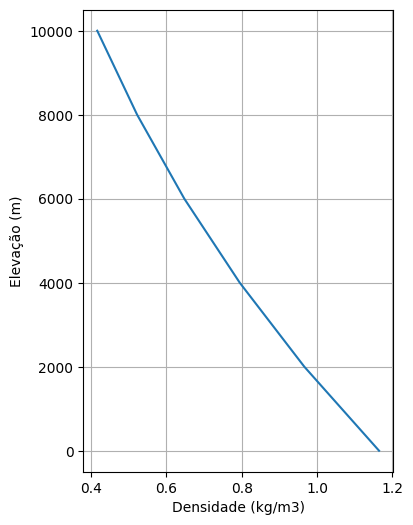

In [27]:
plt.figure(figsize=(4, 6))
plt.plot(tabela['Densidade (kg/m3)'], tabela['Elevação (m)'])
plt.xlabel('Densidade (kg/m3)')
plt.ylabel('Elevação (m)')
plt.grid(True)
plt.show()

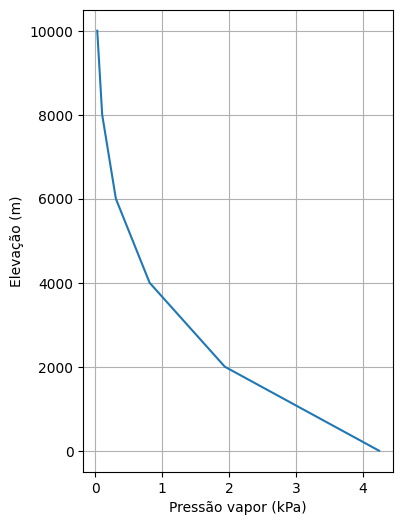

In [28]:
plt.figure(figsize=(4, 6))
plt.plot(tabela['Pressão vapor (kPa)'], tabela['Elevação (m)'])
plt.xlabel('Pressão vapor (kPa)')
plt.ylabel('Elevação (m)')
plt.grid(True)
plt.show()

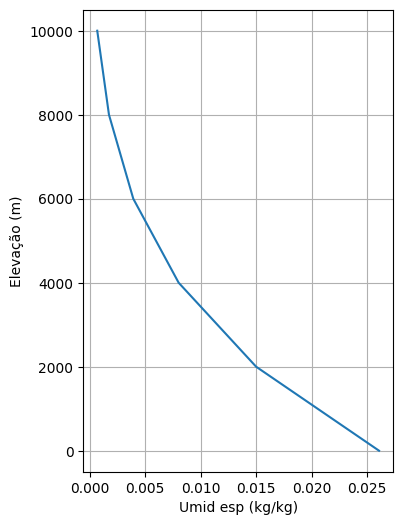

In [29]:
plt.figure(figsize=(4, 6))
plt.plot(tabela['Umid esp (kg/kg)'], tabela['Elevação (m)'])
plt.xlabel('Umid esp (kg/kg)')
plt.ylabel('Elevação (m)')
plt.grid(True)
plt.show()